# Análisis de importaciónes equipos de imagenes médicas en Paraguay año 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importación de los datos

In [2]:
data_TC = pd.read_csv('data/Importaciones CT.csv')

In [3]:
data_US = pd.read_csv('data/Importaciones US.csv')

In [4]:
data_RMI = pd.read_csv('data/Importaciones RMI.csv')

In [5]:
data_RX = pd.read_csv('data/Importaciones RX.csv')

## Tomógrafos Computados

In [6]:
data_TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  21 non-null     object 
 1   PROVEEDOR                   21 non-null     object 
 2   DESPACHO                    21 non-null     object 
 3   CONOCIMIENTO                21 non-null     object 
 4   FECHA                       21 non-null     object 
 5   ITEM                        21 non-null     int64  
 6   POSICION ARANCELARIA        21 non-null     object 
 7   RUBRO                       21 non-null     object 
 8   DESCRIPCION DE LA POSICION  21 non-null     object 
 9   MERCADERIA                  21 non-null     object 
 10  FABRICANTE                  19 non-null     object 
 11  MODELO                      19 non-null     object 
 12  DESTINACION                 21 non-null     object 
 13  REGIMEN                     21 non-nu

In [7]:
data_TC.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,IMPONIBLE U$S,IMPONIBLE GS,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL
0,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE IMPORT,22DA000000005964,4150357238,2022-01-11,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,"110000,00","764571500,00","0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","76886543,00","83815680,00"
1,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE,22DA000000027986,4150356901,2022-01-03,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,"110000,00","757436900,00","0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","76169516,00","83034300,00"
2,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000082550,LEXBRE220108121323,2022-03-18,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 1 ...",...,"187130,42","1304212947,00","0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","0,00","11779532,00"
3,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE,22DA000000091697,U732690,2022-03-24,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,"115000,00","800710500,00","0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","80493756,00","87731681,00"
4,ASUCOM SA,DELEC CIENTIFICA URUGUAY S.A.,22DA000000140922,43175392,2022-04-27,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,APARATOS DE TOMOGRAFIAS COMPUTARIZADOS EN:2.-U...,...,"1018662,06","6969339469,00","0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","700434566,00","763309080,00"


In [8]:
pd.DataFrame(data_TC['IMPORTADOR'].unique(), columns=['Importadores'])

,Importadores
0,RESCORP SOCIEDAD ANONIMA
1,EDUARDO ELIZECHE BENITEZ S.A.C.
2,ASUCOM SA
3,DENTAL GUARANI S.A
4,DYSA HEALTHCARE S.A.
5,EDISON SOCIEDAD DE RESPONSABILIDAD LIMITADA


In [9]:
pd.DataFrame(data_TC['PROVEEDOR'].unique(), columns=['Proveedor'])

,Proveedor
0,GE HEALTHCARE IMPORT
1,GE HEALTHCARE
2,SIEMENS HEALTHCARE GMBH
3,DELEC CIENTIFICA URUGUAY S.A.
4,DE GOTZEN S.R.L.
5,PHILIPS MEDICAL SYSTEM NEDERLAND B.V
6,"SHANGHAI UNITED IMAGING HEALTHCARE CO.,LTD"
7,GE HEALTHCARE TRADE AND DEVELOPMENT LLC
8,GE HEALTHCARE TRADE ABD DEVELOPMENT LLC
9,GE PRECISION HEALTHCARE LLC


In [10]:
data_TC['PROVEEDOR'] = data_TC['PROVEEDOR'].replace('GE HEALTHCARE TRADE ABD DEVELOPMENT LLC', 'GE HEALTHCARE TRADE AND DEVELOPMENT LLC')

In [11]:
pd.DataFrame(data_TC['PROVEEDOR'].unique(), columns=['Proveedor'])

,Proveedor
0,GE HEALTHCARE IMPORT
1,GE HEALTHCARE
2,SIEMENS HEALTHCARE GMBH
3,DELEC CIENTIFICA URUGUAY S.A.
4,DE GOTZEN S.R.L.
5,PHILIPS MEDICAL SYSTEM NEDERLAND B.V
6,"SHANGHAI UNITED IMAGING HEALTHCARE CO.,LTD"
7,GE HEALTHCARE TRADE AND DEVELOPMENT LLC
8,GE PRECISION HEALTHCARE LLC
9,MARE LTDA


In [12]:
columnas_numericas = ['VALOR FOB U$S', 'VALOR FLETE U$S', 'VALOR SEGURO U$S', 'VALOR CIF U$S',
                     'CANTIDAD', 'PRECIO UNITARIO', 'KGS BRUTO', 'KGS NETO', 'VALOR FACTURA',
                     'COTIZACION', 'IMPONIBLE U$S', 'IMPONIBLE GS', 'AJUSTE A INCLUIR',
                     'AJUSTE A DEDUCIR', 'DERECHO', 'ISC', 'RENTA', 'IVA', 'TOTAL']

data_TC[columnas_numericas] = data_TC[columnas_numericas].replace(',', '.', regex=True).astype(float)
data_TC.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,IMPONIBLE U$S,IMPONIBLE GS,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL
0,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE IMPORT,22DA000000005964,4150357238,2022-01-11,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,110000.00,7.645715e+08,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,76886543.0,83815680.0
1,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE,22DA000000027986,4150356901,2022-01-03,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,110000.00,7.574369e+08,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,76169516.0,83034300.0
2,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000082550,LEXBRE220108121323,2022-03-18,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 1 ...",...,187130.42,1.304213e+09,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,0.0,11779532.0
3,RESCORP SOCIEDAD ANONIMA,GE HEALTHCARE,22DA000000091697,U732690,2022-03-24,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,"APARATOS DE TOMOGRAFIAS COMPUTARIZADOS, EN: 01...",...,115000.00,8.007105e+08,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,80493756.0,87731681.0
4,ASUCOM SA,DELEC CIENTIFICA URUGUAY S.A.,22DA000000140922,43175392,2022-04-27,1,9022.12.00.000V,BIENES DE CAPITAL,--APARATOS DE TOMOGRAFIAS COMPUTARIZADOS,APARATOS DE TOMOGRAFIAS COMPUTARIZADOS EN:2.-U...,...,1018662.06,6.969339e+09,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,700434566.0,763309080.0


In [13]:
data_TC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  21 non-null     object 
 1   PROVEEDOR                   21 non-null     object 
 2   DESPACHO                    21 non-null     object 
 3   CONOCIMIENTO                21 non-null     object 
 4   FECHA                       21 non-null     object 
 5   ITEM                        21 non-null     int64  
 6   POSICION ARANCELARIA        21 non-null     object 
 7   RUBRO                       21 non-null     object 
 8   DESCRIPCION DE LA POSICION  21 non-null     object 
 9   MERCADERIA                  21 non-null     object 
 10  FABRICANTE                  19 non-null     object 
 11  MODELO                      19 non-null     object 
 12  DESTINACION                 21 non-null     object 
 13  REGIMEN                     21 non-nu

In [14]:
data_TC['VALOR FINAL'] = (data_TC['TOTAL']/data_TC['COTIZACION'])+data_TC['IMPONIBLE U$S']
data_TC['VALOR FINAL'].head()

0    1.220587e+05
1    1.220588e+05
2    1.888206e+05
3    1.276002e+05
4    1.130230e+06
Name: VALOR FINAL, dtype: float64

In [18]:
categorias = ['FABRICANTE', 'MODELO', 'IMPORTADOR', 'PROVEEDOR', 'RUBRO', 'FABRICANTE', 'MODELO', 'ADUANA', 'PAIS ORIGEN', 'PAIS PROCEDENCIA', 'CANAL']

for cat in categorias:
    data_TC[cat] = data_TC[cat].astype('category')

In [16]:
data_TC = data_TC.drop(data_TC[data_TC['KGS BRUTO'] < 800].index)

In [19]:
data_TC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 0 to 20
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   IMPORTADOR                  19 non-null     category
 1   PROVEEDOR                   19 non-null     category
 2   DESPACHO                    19 non-null     object  
 3   CONOCIMIENTO                19 non-null     object  
 4   FECHA                       19 non-null     object  
 5   ITEM                        19 non-null     int64   
 6   POSICION ARANCELARIA        19 non-null     object  
 7   RUBRO                       19 non-null     category
 8   DESCRIPCION DE LA POSICION  19 non-null     object  
 9   MERCADERIA                  19 non-null     object  
 10  FABRICANTE                  19 non-null     category
 11  MODELO                      19 non-null     category
 12  DESTINACION                 19 non-null     object  
 13  REGIMEN                    

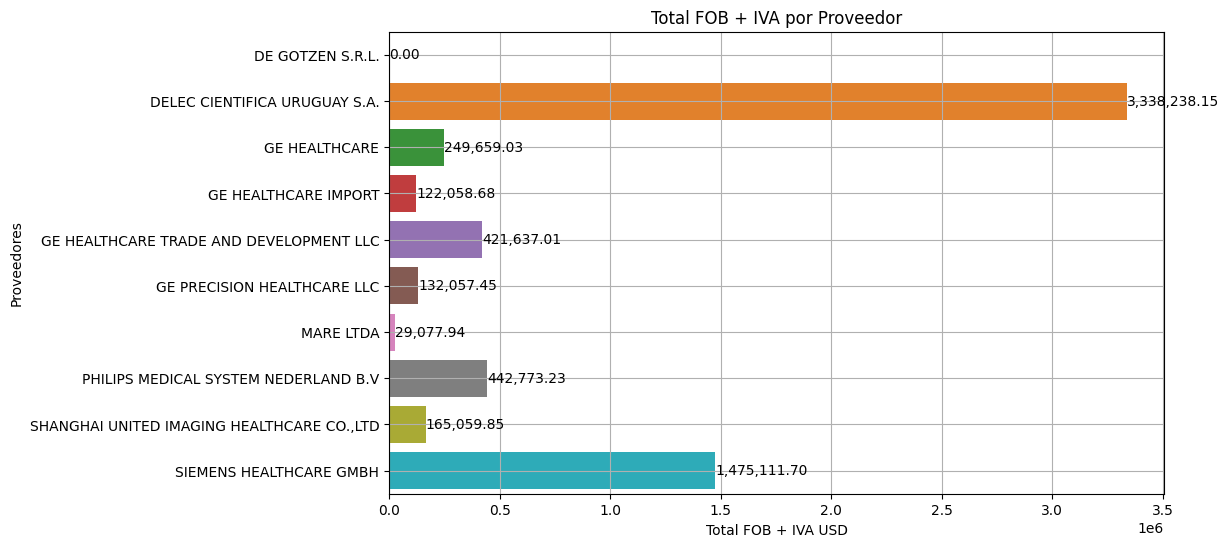

In [22]:
plt.figure(figsize=(10, 6))
# Agrupar y sumar por proveedor
proveedores_totales = data_TC.groupby('PROVEEDOR')['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
sns.barplot(data=proveedores_totales, x='VALOR FINAL', y='PROVEEDOR')
plt.xlabel('Total FOB + IVA USD')
plt.ylabel('Proveedores')
plt.title('Total FOB + IVA por Proveedor')

# Agregar etiquetas de valor
for i, total in enumerate(proveedores_totales['VALOR FINAL']):
    plt.annotate(format(total, ',.2f'), (total, i), ha='left', va='center')

# Activar las grillas
plt.grid(True)

plt.show()

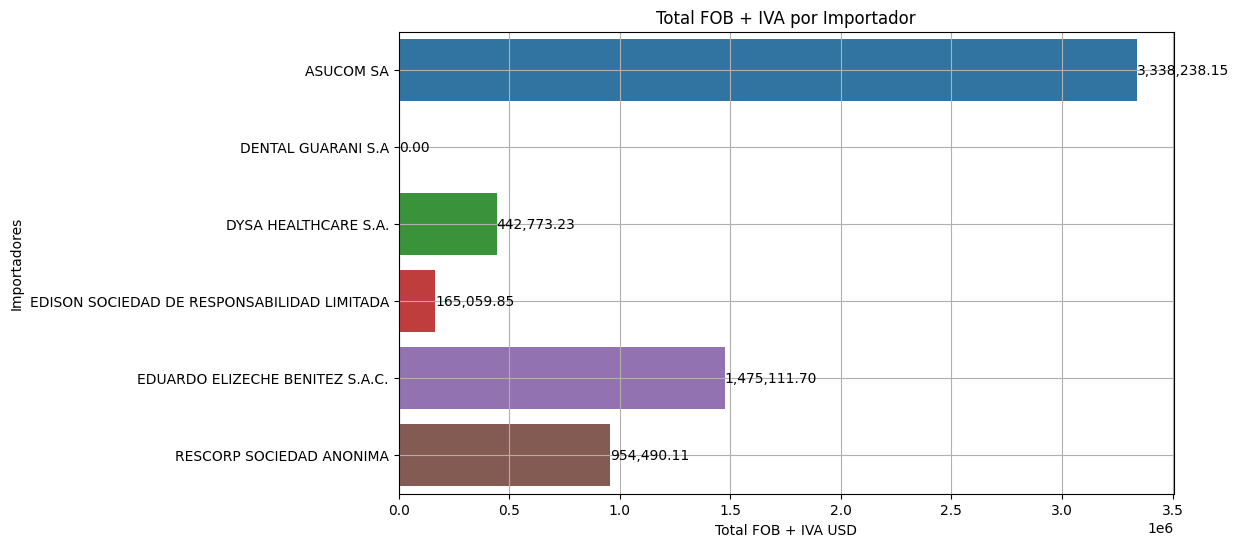

In [25]:
plt.figure(figsize=(10, 6))
# Agrupar y sumar por importador
importadores_totales = data_TC.groupby('IMPORTADOR')['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
sns.barplot(data=importadores_totales, x='VALOR FINAL', y='IMPORTADOR')
plt.xlabel('Total FOB + IVA USD')
plt.ylabel('Importadores')
plt.title('Total FOB + IVA por Importador')

# Agregar etiquetas de valor
for i, total in enumerate(importadores_totales['VALOR FINAL']):
    plt.annotate(format(total, ',.2f'), (total, i), ha='left', va='center')

# Activar las grillas
plt.grid(True)

plt.show()

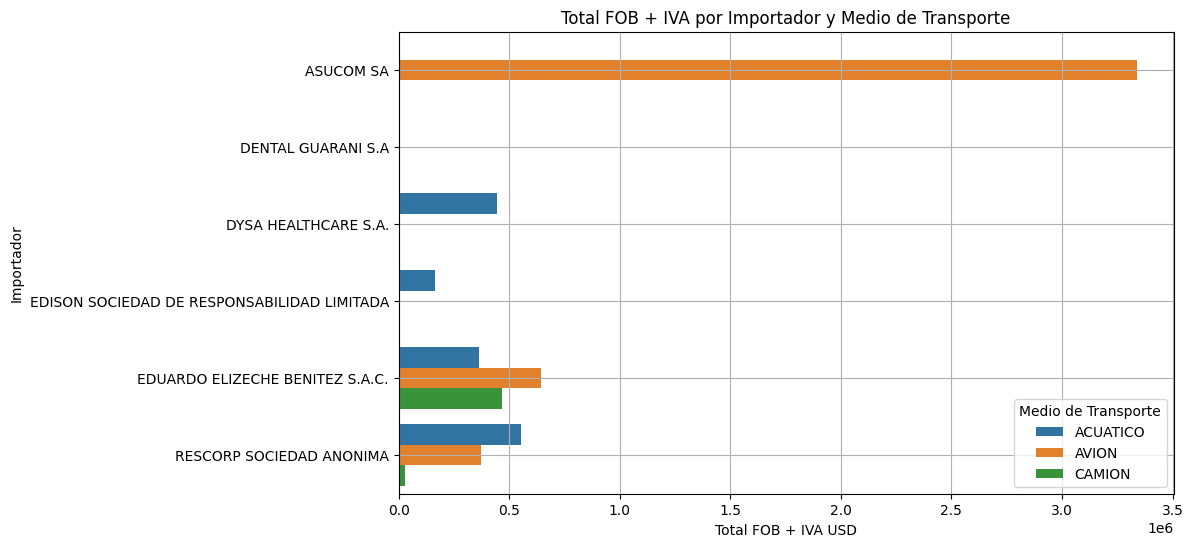

In [26]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por importador y medio de transporte
importador_medio_total = data_TC.groupby(['IMPORTADOR', 'MEDIO'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=importador_medio_total, y='IMPORTADOR', x='VALOR FINAL', hue='MEDIO')
plt.ylabel('Importador')
plt.xlabel('Total FOB + IVA USD')
plt.title('Total FOB + IVA por Importador y Medio de Transporte')
plt.legend(title='Medio de Transporte')

# Activar las grillas
plt.grid(True)

plt.show()


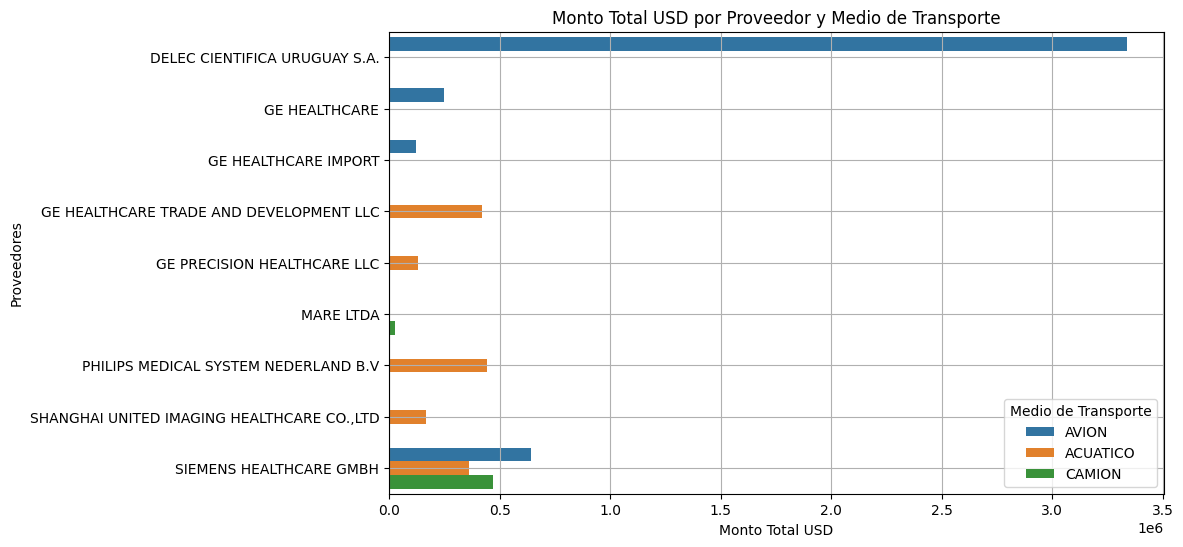

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por proveedor y medio de transporte
proveedor_medio_total = data_TC.groupby(['PROVEEDOR', 'MEDIO'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=proveedor_medio_total, y='PROVEEDOR', x='VALOR FINAL', hue='MEDIO')
plt.ylabel('Proveedores')
plt.xlabel('Monto Total USD')
plt.title('Monto Total USD por Proveedor y Medio de Transporte')
plt.legend(title='Medio de Transporte')

# Activar las grillas
plt.grid(True)

plt.show()

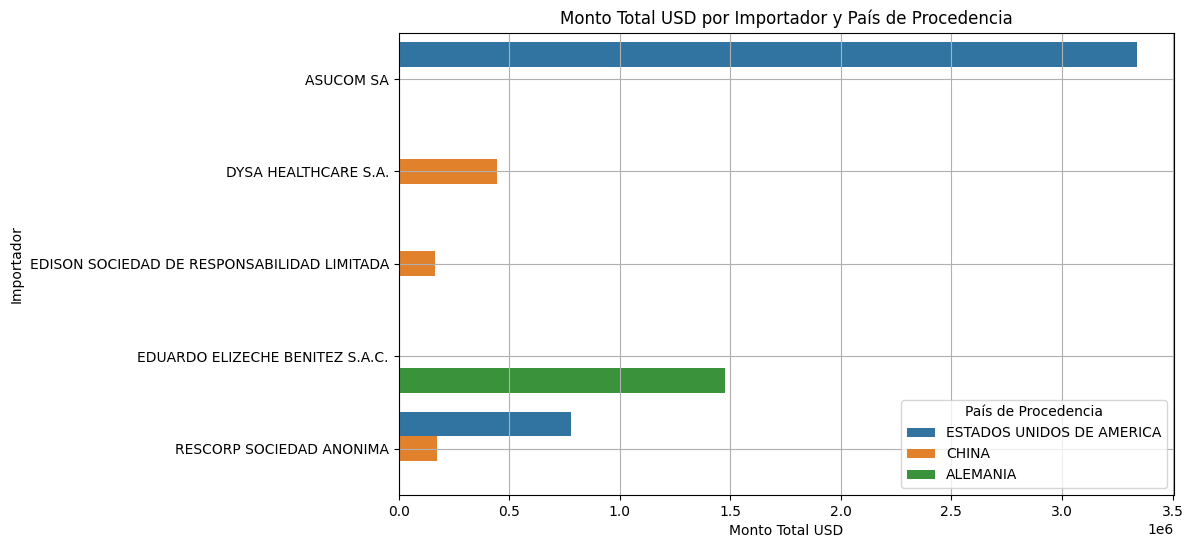

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por importador y medio de transporte
importador_procedencia_total = data_TC.groupby(['IMPORTADOR', 'PAIS PROCEDENCIA'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=importador_procedencia_total, y='IMPORTADOR', x='VALOR FINAL', hue='PAIS PROCEDENCIA')
plt.ylabel('Importador')
plt.xlabel('Monto Total USD')
plt.title('Monto Total USD por Importador y País de Procedencia')
plt.legend(title='País de Procedencia')

# Activar las grillas
plt.grid(True)

plt.show()

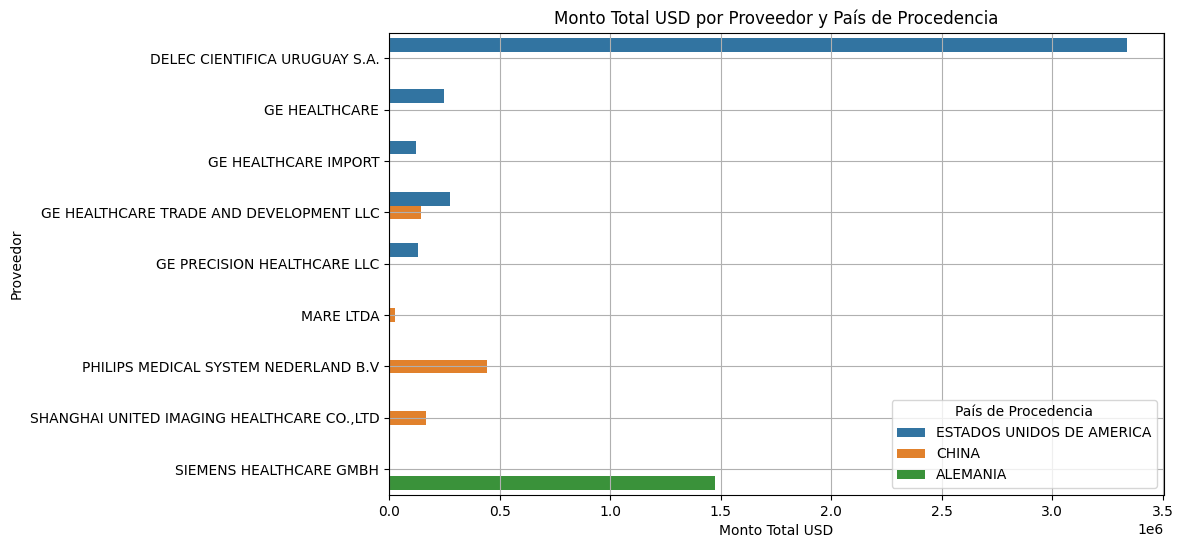

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por proveedor y medio de transporte
proveedor_procedencia_total = data_TC.groupby(['PROVEEDOR', 'PAIS PROCEDENCIA'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=proveedor_procedencia_total, y='PROVEEDOR', x='VALOR FINAL', hue='PAIS PROCEDENCIA')
plt.ylabel('Proveedor')
plt.xlabel('Monto Total USD')
plt.title('Monto Total USD por Proveedor y País de Procedencia')
plt.legend(title='País de Procedencia')

# Activar las grillas
plt.grid(True)

plt.show()

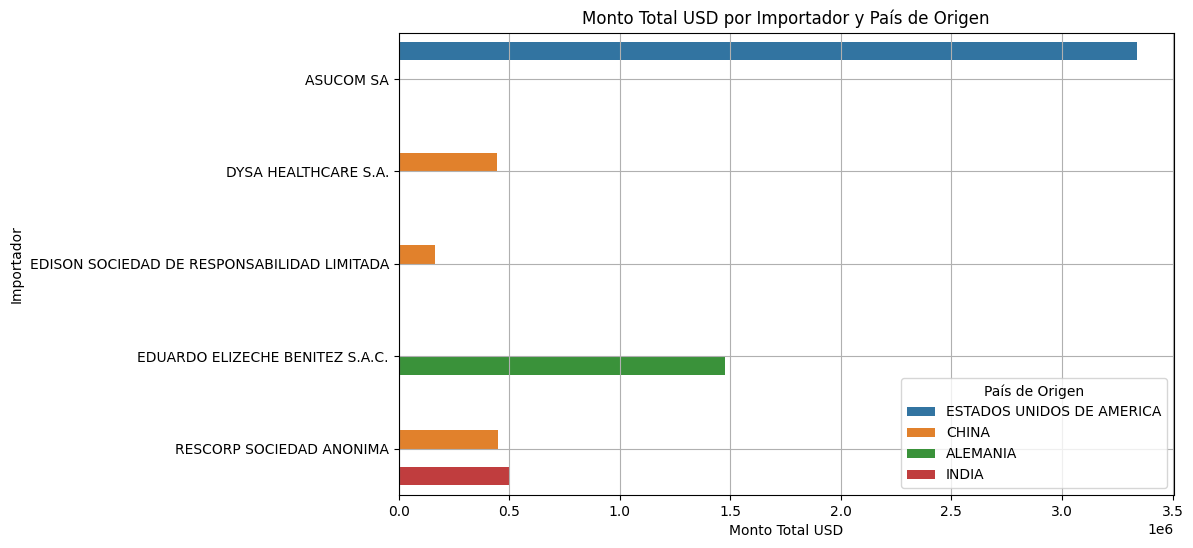

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por importador y medio de transporte
importador_origen_total = data_TC.groupby(['IMPORTADOR', 'PAIS ORIGEN'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=importador_origen_total, y='IMPORTADOR', x='VALOR FINAL', hue='PAIS ORIGEN')
plt.ylabel('Importador')
plt.xlabel('Monto Total USD')
plt.title('Monto Total USD por Importador y País de Origen')
plt.legend(title='País de Origen')

# Activar las grillas
plt.grid(True)

plt.show()

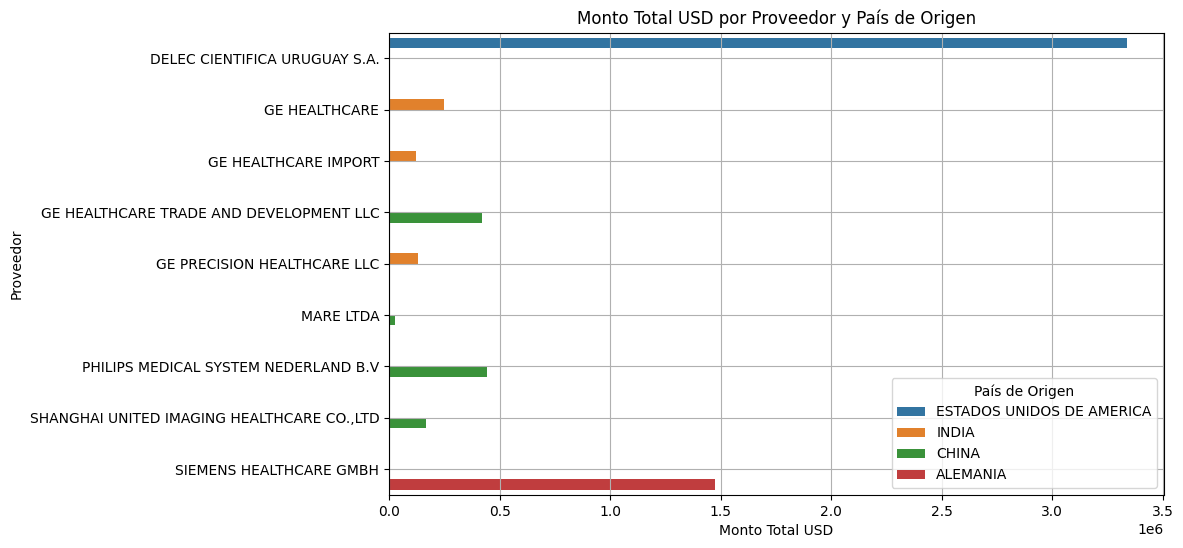

In [ ]:
plt.figure(figsize=(10, 6))

# Agrupar y sumar por proveedor y medio de transporte
proveedor_origen_total = data_TC.groupby(['PROVEEDOR', 'PAIS ORIGEN'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=proveedor_origen_total, y='PROVEEDOR', x='VALOR FINAL', hue='PAIS ORIGEN')
plt.ylabel('Proveedor')
plt.xlabel('Monto Total USD')
plt.title('Monto Total USD por Proveedor y País de Origen')
plt.legend(title='País de Origen')

# Activar las grillas
plt.grid(True)

plt.show()

In [ ]:
data_TC['FECHA'] = pd.to_datetime(data_TC['FECHA'])
data_TC['FECHA'] = data_TC['FECHA'].dt.date

In [ ]:
data_TC['FECHA'].head()

0    2022-01-11
1    2022-01-03
2    2022-03-18
3    2022-03-24
4    2022-04-27
Name: FECHA, dtype: object

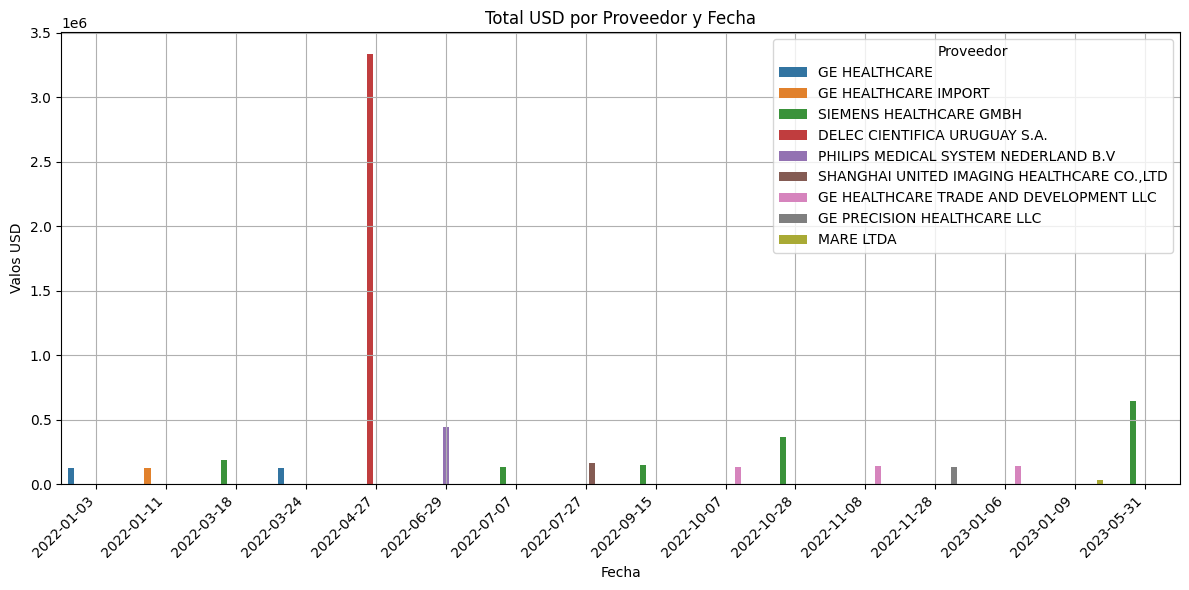

In [ ]:
plt.figure(figsize=(12, 6))

# Agrupar por fecha y proveedor y sumar el total
proveedor_fecha_total = data_TC.groupby(['FECHA', 'PROVEEDOR'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=proveedor_fecha_total, x='FECHA', y='VALOR FINAL', hue='PROVEEDOR')
plt.xlabel('Fecha')
plt.ylabel('Valos USD')
plt.title('Total USD por Proveedor y Fecha')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Proveedor')

# Activar las grillas
plt.grid(True)

plt.tight_layout()
plt.show()

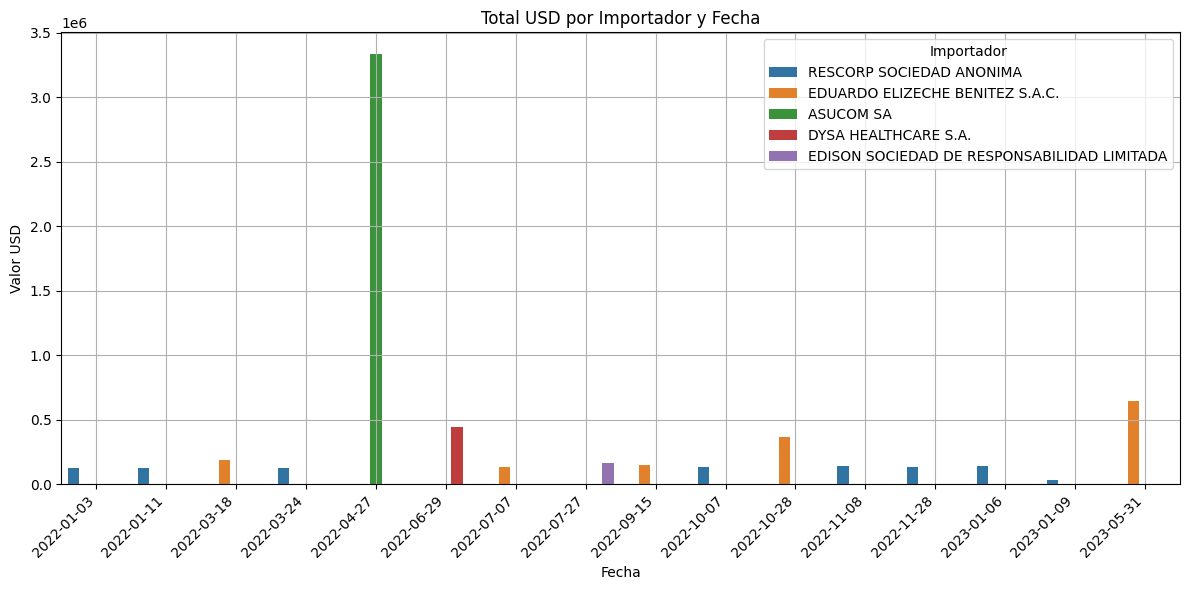

In [ ]:
plt.figure(figsize=(12, 6))

# Agrupar por fecha y importador y sumar el total
importador_fecha_total = data_TC.groupby(['FECHA', 'IMPORTADOR'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=importador_fecha_total, x='FECHA', y='VALOR FINAL', hue='IMPORTADOR')
plt.xlabel('Fecha')
plt.ylabel('Valor USD')
plt.title('Total USD por Importador y Fecha')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Importador')

# Activar las grillas
plt.grid(True)

plt.tight_layout()
plt.show()

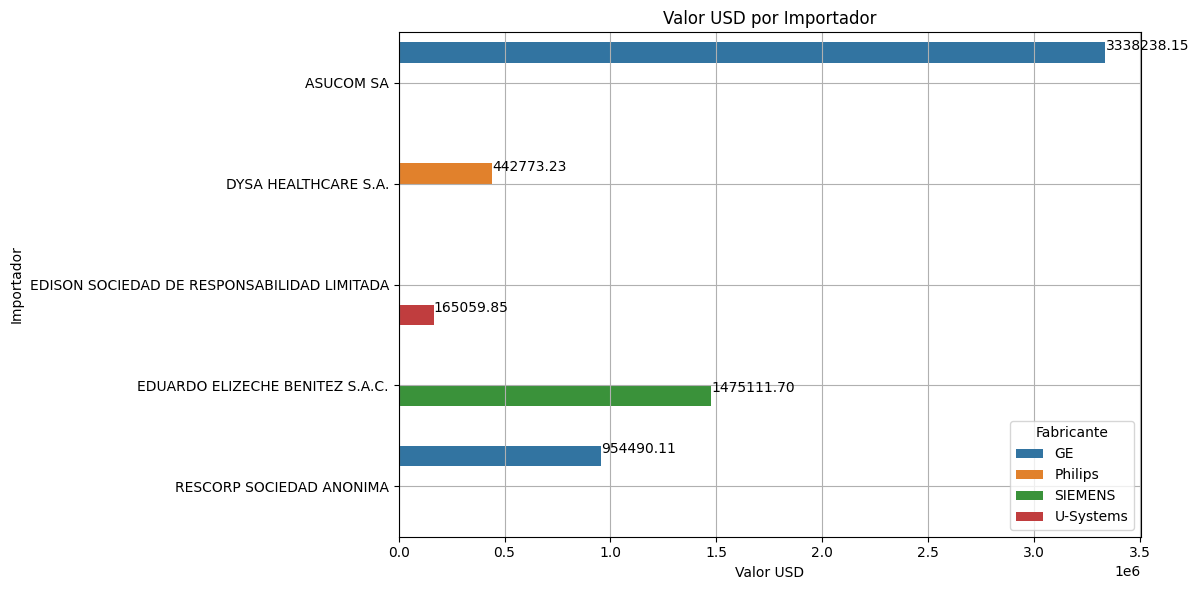

In [ ]:
plt.figure(figsize=(12, 6))
importador_fabricante_total = data_TC.groupby(['IMPORTADOR', 'FABRICANTE'])['VALOR FINAL'].sum().reset_index()
ax = sns.barplot(data=importador_fabricante_total, y='IMPORTADOR', x='VALOR FINAL', hue='FABRICANTE', edgecolor='none')
plt.ylabel('Importador')
plt.xlabel('Valor USD')
plt.title('Valor USD por Importador')
plt.legend(title='Fabricante')

# Activar las grillas
plt.grid(True)

# Agregar etiquetas de valor a las barras
for p in ax.patches:
    width = p.get_width()
    if (np.isfinite(width)) & (width != 0):  # Verificar si el valor de width es finito
        plt.text(x=width, y=p.get_y() + p.get_height() / 2, s=f'{width:.2f}', ha='left', va='bottom')

plt.tight_layout()
plt.show()

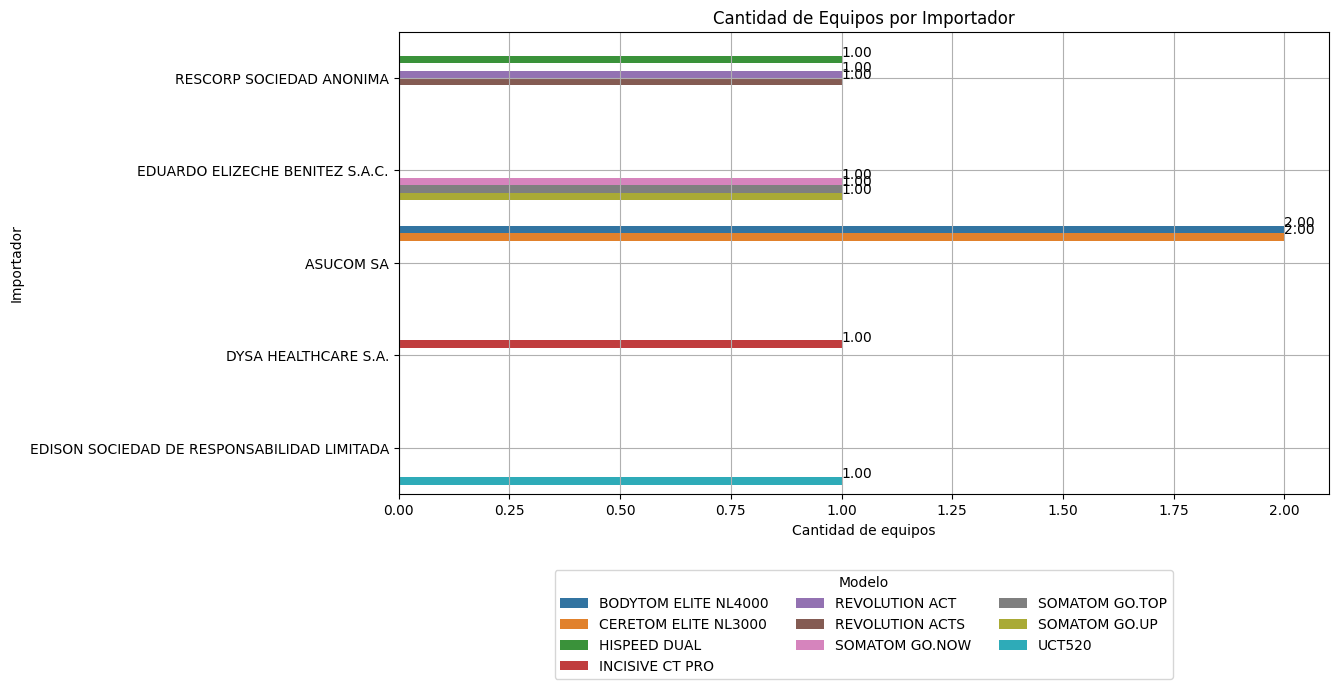

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data_TC, y='IMPORTADOR', x='CANTIDAD', hue='MODELO', edgecolor='none')
plt.ylabel('Importador')
plt.xlabel('Cantidad de equipos')
plt.title('Cantidad de Equipos por Importador')
#plt.legend(title='Modelo')

# Activar las grillas
plt.grid(True)

# Agregar etiquetas de valor a las barras
for p in ax.patches:
    width = p.get_width()
    if np.isfinite(width):  # Verificar si el valor de width es finito
        plt.text(x=width, y=p.get_y() + p.get_height() / 2, s=f'{width:.2f}', ha='left', va='bottom')

# Mover la leyenda a la parte inferior
plt.legend(title='Modelo', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

plt.show()

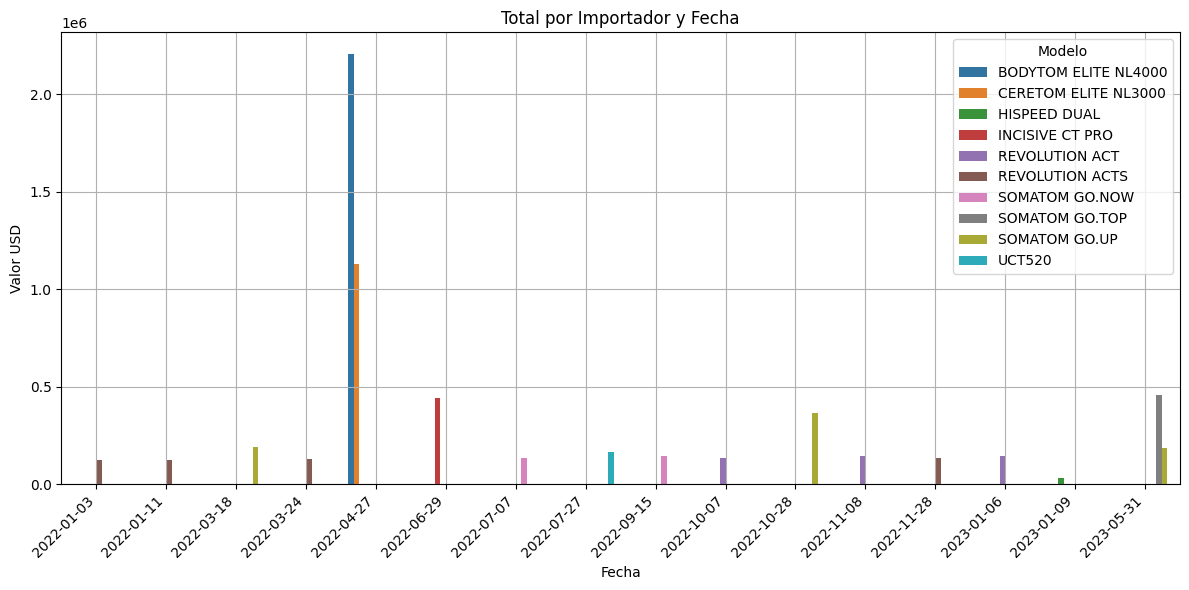

In [ ]:
plt.figure(figsize=(12, 6))

# Agrupar por fecha y importador y sumar el total
importador_fecha_total = data_TC.groupby(['FECHA', 'MODELO'])['VALOR FINAL'].sum().reset_index()

# Crear el gráfico de barras
ax = sns.barplot(data=importador_fecha_total, x='FECHA', y='VALOR FINAL', hue='MODELO')
plt.xlabel('Fecha')
plt.ylabel('Valor USD')
plt.title('Total por Importador y Fecha')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Modelo')

# Activar las grillas
plt.grid(True)

plt.tight_layout()
plt.show()

# Análisis US

In [ ]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  251 non-null    object 
 1   PROVEEDOR                   251 non-null    object 
 2   DESPACHO                    251 non-null    object 
 3   CONOCIMIENTO                251 non-null    object 
 4   FECHA                       251 non-null    object 
 5   ITEM                        251 non-null    int64  
 6   POSICION ARANCELARIA        251 non-null    object 
 7   RUBRO                       251 non-null    object 
 8   DESCRIPCION DE LA POSICION  251 non-null    object 
 9   MERCADERIA                  251 non-null    object 
 10  DESTINACION                 251 non-null    object 
 11  REGIMEN                     251 non-null    object 
 12  ADUANA                      251 non-null    object 
 13  MEDIO                       251 non

In [ ]:
data_US.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL,VALOR FINAL,VALOR FINAL POR CANTIDAD
0,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,1,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,ECOGRAFO VIVID T9 V203,...,"0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","17859329,00","19479907,00","28318,89","28318,89377"
1,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,2,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 3SC-RS,...,"0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","2347527,00","2560544,00","3722,39","3722,388935"
2,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,3,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 6S-RS,...,"0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","3396713,00","3704936,00","5386,05","5386,045"
3,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,4,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 12S-RS,...,"0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","3488315,00","3804850,00","5531,30","5531,29547"
4,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,5,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR L6S-12RS,...,"0,00","0,00",SIN ACUERDO,"0,00","0,00","0,00","1391526,00","1517795,00","2206,49","2206,492019"


In [ ]:
pd.DataFrame(data_US['IMPORTADOR'].unique(), columns=['Importadores'])

,Importadores
0,SOLUMEDIC SA
1,CUERPO DE BOMBEROS VOLUNTARIOS DE NARANJAL
2,TECHMED SOCIEDAD DE RESPONSABILIDAD LIMITADA
3,RECAUCHUTADORA INDUSTRIAL DEL PARAGUAY SRL
4,DEZETA SA
5,LUNA VANESA SAUEL
6,LA CASA DEL MEDICO SA
7,EDISON SOCIEDAD DE RESPONSABILIDAD LIMITADA
8,STEVEN S SA
9,ARGON SRL


In [ ]:
data_US.drop(['VALOR FINAL', 'VALOR FINAL POR CANTIDAD'], axis=1, inplace=True)

In [ ]:
columnas_numericas = ['VALOR FOB U$S', 'VALOR FLETE U$S', 'VALOR SEGURO U$S', 'VALOR CIF U$S',
                     'CANTIDAD', 'PRECIO UNITARIO', 'KGS BRUTO', 'KGS NETO', 'VALOR FACTURA',
                     'COTIZACION', 'IMPONIBLE U$S', 'IMPONIBLE GS', 'AJUSTE A INCLUIR',
                     'AJUSTE A DEDUCIR', 'DERECHO', 'ISC', 'RENTA', 'IVA', 'TOTAL']

data_US[columnas_numericas] = data_US[columnas_numericas].replace(',', '.', regex=True).astype(float)
data_US.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,IMPONIBLE U$S,IMPONIBLE GS,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL
0,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,1,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,ECOGRAFO VIVID T9 V203,...,25517.13,177413715.0,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,17859329.0,19479907.0
1,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,2,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 3SC-RS,...,3354.11,23320221.0,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,2347527.0,2560544.0
2,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,3,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 6S-RS,...,4853.17,33742781.0,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,3396713.0,3704936.0
3,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,4,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 12S-RS,...,4984.05,34652754.0,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,3488315.0,3804850.0
4,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,5,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR L6S-12RS,...,1988.19,13823348.0,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,1391526.0,1517795.0


In [ ]:
data_US['VALOR FINAL'] = data_US['TOTAL']/data_US['COTIZACION'] + data_US['IMPONIBLE U$S']

In [ ]:
data_US['VALOR FINAL POR CANTIDAD'] = data_US['VALOR FINAL']/data_US['CANTIDAD']

In [ ]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  251 non-null    object 
 1   PROVEEDOR                   251 non-null    object 
 2   DESPACHO                    251 non-null    object 
 3   CONOCIMIENTO                251 non-null    object 
 4   FECHA                       251 non-null    object 
 5   ITEM                        251 non-null    int64  
 6   POSICION ARANCELARIA        251 non-null    object 
 7   RUBRO                       251 non-null    object 
 8   DESCRIPCION DE LA POSICION  251 non-null    object 
 9   MERCADERIA                  251 non-null    object 
 10  DESTINACION                 251 non-null    object 
 11  REGIMEN                     251 non-null    object 
 12  ADUANA                      251 non-null    object 
 13  MEDIO                       251 non

In [ ]:
data_US = data_US.drop(data_US[data_US['VALOR FINAL POR CANTIDAD'] < 5000].index)

In [ ]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 250
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  158 non-null    object 
 1   PROVEEDOR                   158 non-null    object 
 2   DESPACHO                    158 non-null    object 
 3   CONOCIMIENTO                158 non-null    object 
 4   FECHA                       158 non-null    object 
 5   ITEM                        158 non-null    int64  
 6   POSICION ARANCELARIA        158 non-null    object 
 7   RUBRO                       158 non-null    object 
 8   DESCRIPCION DE LA POSICION  158 non-null    object 
 9   MERCADERIA                  158 non-null    object 
 10  DESTINACION                 158 non-null    object 
 11  REGIMEN                     158 non-null    object 
 12  ADUANA                      158 non-null    object 
 13  MEDIO                       158 non

In [ ]:
data_US = data_US.dropna(subset=['VALOR FINAL POR CANTIDAD'])

In [ ]:
# Definir los límites de los rangos de precios
rango_precios = [5000, 15000, 25000, 35000, 45000, 55000, 65000, 75000, float('inf')]  # Ejemplo de límites de precios, ajusta según tus necesidades

# Crear la nueva columna categórica basada en los rangos de precios
data_US['RANGO DE PRECIOS'] = pd.cut(data_US['VALOR FINAL POR CANTIDAD'], bins=rango_precios, labels=False, right=False)

# Asignar etiquetas a los rangos de precios
etiquetas_rangos = ['5000-15000', '15000-25000', '25000-35000', '35000-45000', '45000-55000', '55000-65000', '65000-75000', '>75000']  # Ejemplo de etiquetas de los rangos de precios, ajusta según tus necesidades
data_US['RANGO DE PRECIOS'] = data_US['RANGO DE PRECIOS'].apply(lambda x: etiquetas_rangos[int(x)])

data_US.reset_index
# Verificar el resultado
data_US['RANGO DE PRECIOS'].head()

<ipython-input-44-bc0850f5797e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['RANGO DE PRECIOS'] = pd.cut(data_US['VALOR FINAL POR CANTIDAD'], bins=rango_precios, labels=False, right=False)
<ipython-input-44-bc0850f5797e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['RANGO DE PRECIOS'] = data_US['RANGO DE PRECIOS'].apply(lambda x: etiquetas_rangos[int(x)])


0     25000-35000
2      5000-15000
3      5000-15000
12     5000-15000
16    35000-45000
Name: RANGO DE PRECIOS, dtype: object

In [ ]:
# Convertir la columna "RANGO DE PRECIOS" a tipo category con el orden deseado
data_US['RANGO DE PRECIOS'] = pd.Categorical(data_US['RANGO DE PRECIOS'], categories=etiquetas_rangos, ordered=True)

<ipython-input-45-77fa397c0157>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US['RANGO DE PRECIOS'] = pd.Categorical(data_US['RANGO DE PRECIOS'], categories=etiquetas_rangos, ordered=True)


In [ ]:
data_US.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL,VALOR FINAL,VALOR FINAL POR CANTIDAD,RANGO DE PRECIOS
0,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,1,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,ECOGRAFO VIVID T9 V203,...,0.0,SIN ACUERDO,0.0,0.0,0.0,17859329.0,19479907.0,28318.893768,28318.893768,25000-35000
2,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,3,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 6S-RS,...,0.0,SIN ACUERDO,0.0,0.0,0.0,3396713.0,3704936.0,5386.045000,5386.045000,5000-15000
3,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000000993,4396902977,2022-01-05,4,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,TRANSDUCTOR 12S-RS,...,0.0,SIN ACUERDO,0.0,0.0,0.0,3488315.0,3804850.0,5531.295470,5531.295470,5000-15000
12,TECHMED SOCIEDAD DE RESPONSABILIDAD LIMITADA,"VINNO TECNOLOGY (SUZHOU)CO.,LTD",22DA000000002724,47765174,2022-01-06,1,9018.12.90.000Y,BIENES DE CAPITAL,LOS DEM?S,1 UNIDAD DE PORTABLE VINNO6 COLOR ULTRASONIC S...,...,0.0,SIN ACUERDO,0.0,0.0,0.0,9417468.0,10276055.0,14923.968502,14923.968502,5000-15000
16,SOLUMEDIC SA,"GENERAL ELECTRIC MEDICAL SYSTEMS, ULTRASOUND A...",22DA000000020748,422619129,2022-01-26,1,9018.12.10.000V,BIENES DE CAPITAL,EC?GRAFOS CON AN?LISIS ESPECTRAL DOPPLER,01.- EQUIPO DE ECOGRAFO VIVID S70N; SERIE NRO:...,...,0.0,SIN ACUERDO,0.0,0.0,0.0,25744141.0,28083184.0,40219.206669,40219.206669,35000-45000


In [ ]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 250
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   IMPORTADOR                  99 non-null     object  
 1   PROVEEDOR                   99 non-null     object  
 2   DESPACHO                    99 non-null     object  
 3   CONOCIMIENTO                99 non-null     object  
 4   FECHA                       99 non-null     object  
 5   ITEM                        99 non-null     int64   
 6   POSICION ARANCELARIA        99 non-null     object  
 7   RUBRO                       99 non-null     object  
 8   DESCRIPCION DE LA POSICION  99 non-null     object  
 9   MERCADERIA                  99 non-null     object  
 10  DESTINACION                 99 non-null     object  
 11  REGIMEN                     99 non-null     object  
 12  ADUANA                      99 non-null     object  
 13  MEDIO                

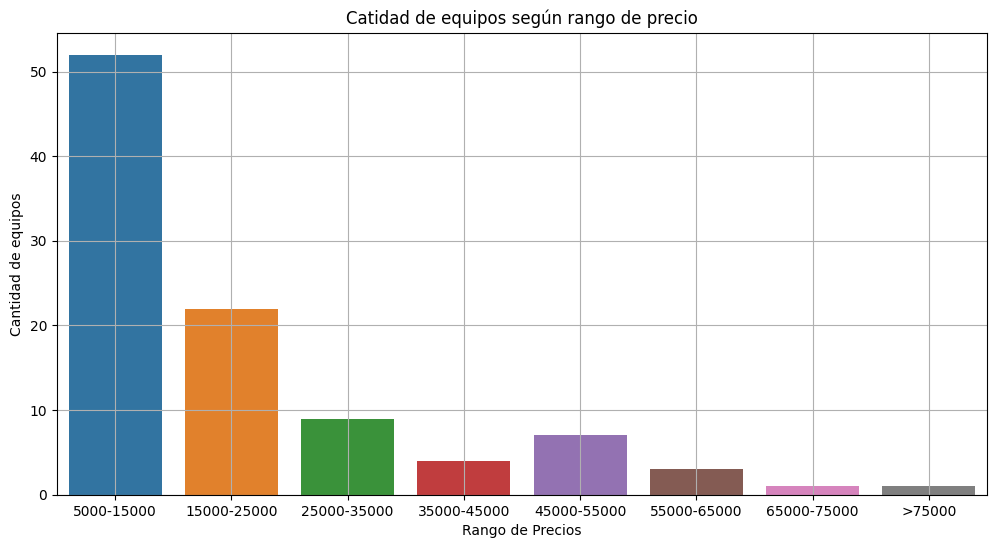

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_US, x='RANGO DE PRECIOS')
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad de equipos')
plt.title('Catidad de equipos según rango de precio')
#plt.legend(title='Importadores')
# Activar las grillas
plt.grid(True)

plt.show()

In [ ]:
#data_US['IMPORTADOR'] = data_TC['IMPORTADOR'].astype('category')

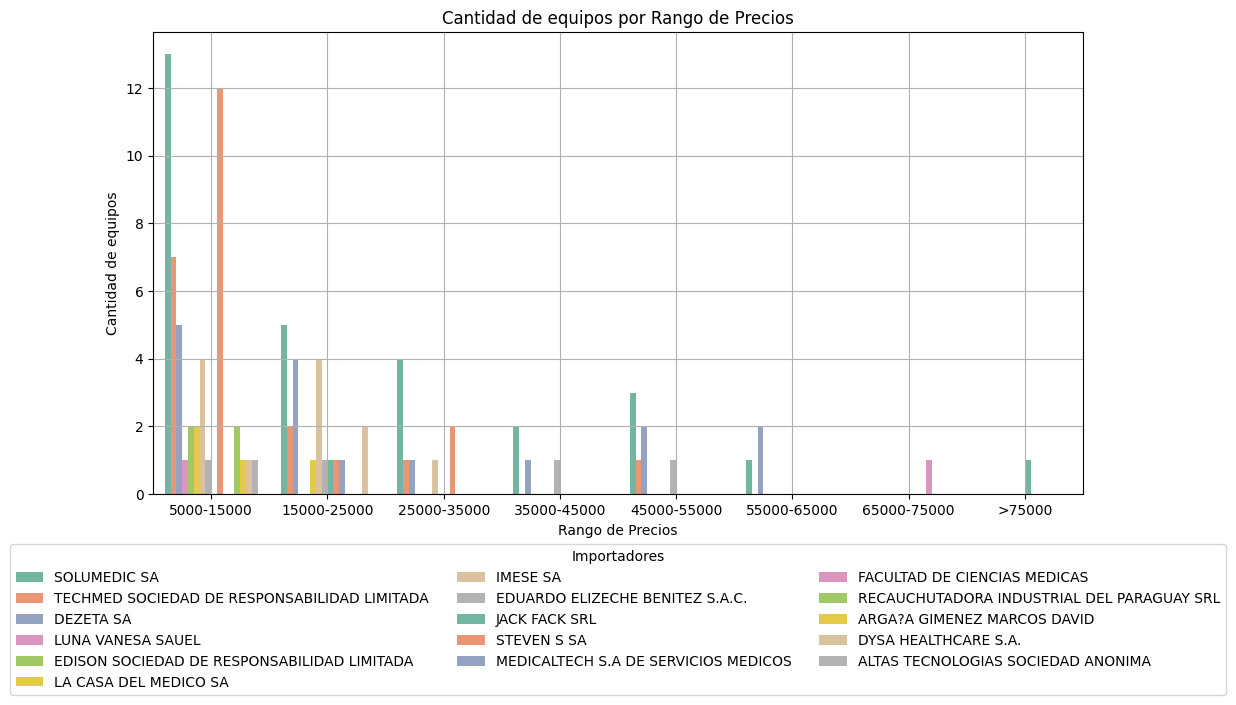

In [ ]:
# Generar una paleta de colores personalizada
colores = sns.color_palette('Set2')  # Puedes ajustar el nombre de la paleta según tus preferencias

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_US, x='RANGO DE PRECIOS', hue='IMPORTADOR', palette=colores)
plt.xlabel('Rango de Precios')
plt.ylabel('Cantidad de equipos')
plt.title('Cantidad de equipos por Rango de Precios')
plt.grid(True)

# Mover las leyendas debajo del gráfico, centradas y en múltiples columnas
ax.legend(title='Importadores', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.45))

plt.show()

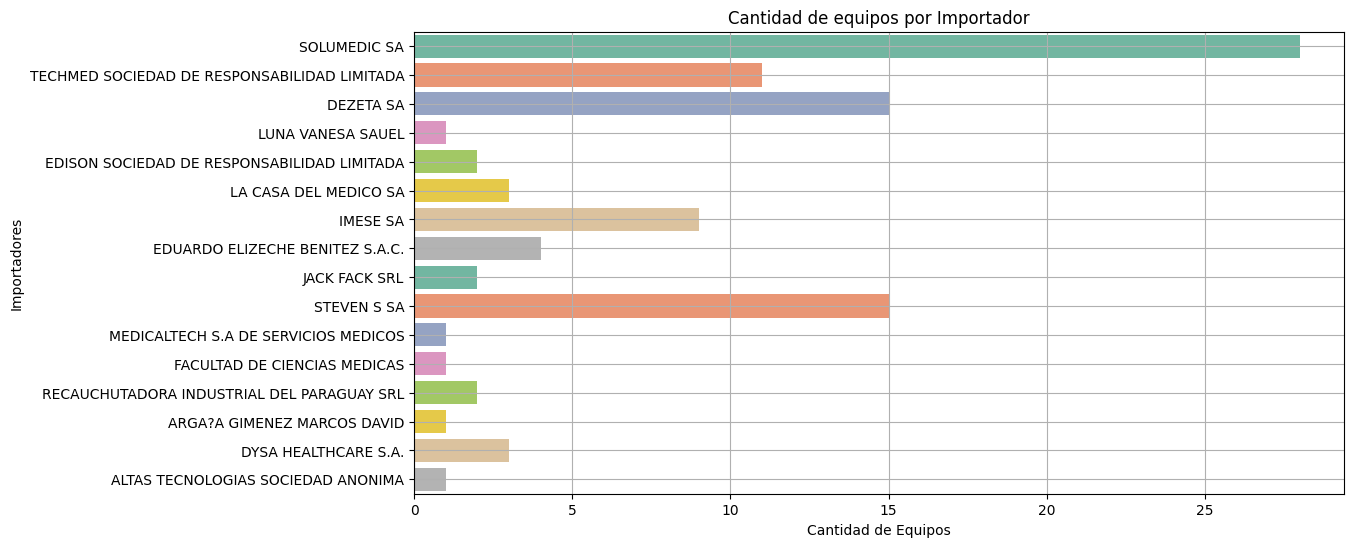

In [ ]:
# Generar una paleta de colores personalizada
colores = sns.color_palette('Set2')  # Puedes ajustar el nombre de la paleta según tus preferencias

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_US, y='IMPORTADOR', palette=colores)
plt.xlabel('Cantidad de Equipos')
plt.ylabel('Importadores')
plt.title('Cantidad de equipos por Importador')
plt.grid(True)

# Mover las leyendas debajo del gráfico, centradas y en múltiples columnas
#ax.legend(title='Importadores', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.45))

plt.show()

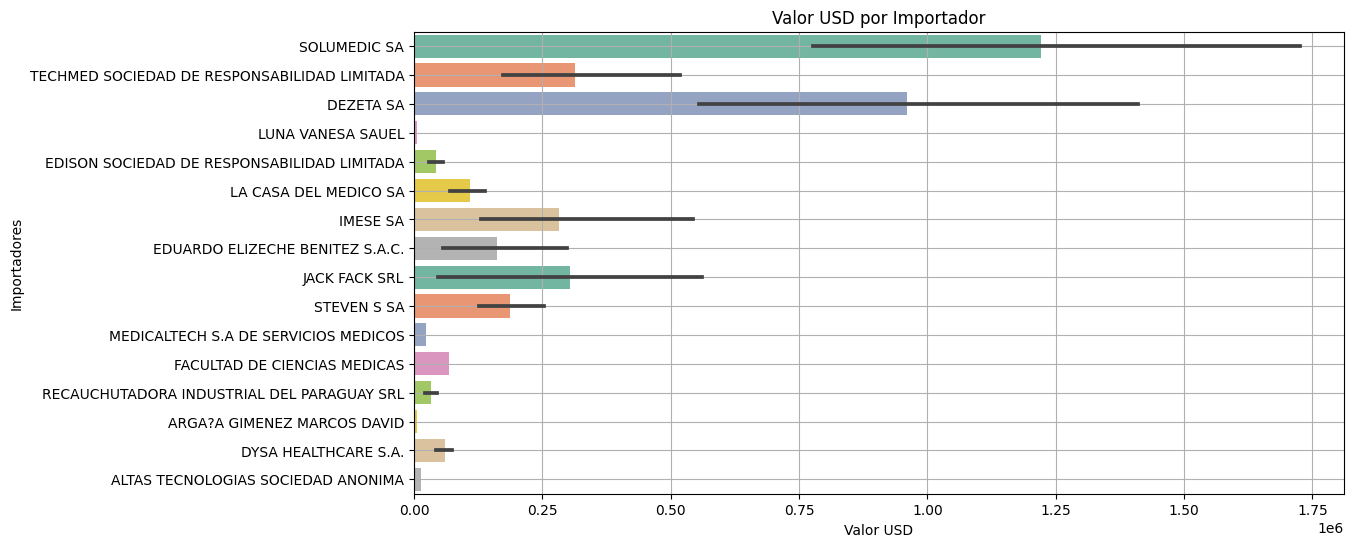

In [ ]:
# Generar una paleta de colores personalizada
colores = sns.color_palette('Set2')  # Puedes ajustar el nombre de la paleta según tus preferencias

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data_US, y='IMPORTADOR', x='VALOR FINAL', palette=colores, estimator='sum')
plt.xlabel('Valor USD')
plt.ylabel('Importadores')
plt.title('Valor USD por Importador')
plt.grid(True)

# Mover las leyendas debajo del gráfico, centradas y en múltiples columnas
#ax.legend(title='Importadores', loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.45))

plt.show()

# Análisis de Resonancia

In [ ]:
data_RMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  15 non-null     object 
 1   PROVEEDOR                   15 non-null     object 
 2   DESPACHO                    15 non-null     object 
 3   CONOCIMIENTO                15 non-null     object 
 4   FECHA                       15 non-null     object 
 5   ITEM                        15 non-null     int64  
 6   POSICION ARANCELARIA        15 non-null     object 
 7   RUBRO                       15 non-null     object 
 8   DESCRIPCION DE LA POSICION  15 non-null     object 
 9   MERCADERIA                  15 non-null     object 
 10  DESTINACION                 15 non-null     object 
 11  REGIMEN                     15 non-null     object 
 12  ADUANA                      15 non-null     object 
 13  MEDIO                       15 non-nu

In [ ]:
columnas_numericas = ['VALOR FOB U$S', 'VALOR FLETE U$S', 'VALOR SEGURO U$S', 'VALOR CIF U$S',
                     'CANTIDAD', 'PRECIO UNITARIO', 'KGS BRUTO', 'KGS NETO', 'VALOR FACTURA',
                     'COTIZACION', 'IMPONIBLE U$S', 'IMPONIBLE GS', 'AJUSTE A INCLUIR',
                     'AJUSTE A DEDUCIR', 'DERECHO', 'ISC', 'RENTA', 'IVA', 'TOTAL']

data_RMI[columnas_numericas] = data_RMI[columnas_numericas].replace(',', '.', regex=True).astype(float)
data_RMI.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,IMPONIBLE U$S,IMPONIBLE GS,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL
0,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000201993,JCCA70221,2022-08-05,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N POR...,...,556719.25,3.820536e+09,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,0.0,34476525.0
1,RESCORP SOCIEDAD ANONIMA,"GE HEALTHCARE GLOBAL PARTS COMPANY, INC",22DA000000230476,5994498635,2022-08-10,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,579.10,3.977826e+06,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,410075.0,446367.0
2,RESCORP SOCIEDAD ANONIMA,GE PRECISION HEALTHCARE LLC,22DA000000732603,4150373816,2022-11-07,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,402568.78,2.918479e+09,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,293330376.0,319671208.0
3,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000781704,47572873,2022-12-27,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N POR...,...,973324.81,7.125409e+09,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,0.0,64287502.0
4,RESCORP SOCIEDAD ANONIMA,GE MEDICAL SYSTEMS,23DA000000017057,6925060063,2023-01-12,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,3375.24,2.495572e+07,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,2530231.0,2756219.0


In [ ]:
data_RMI['VALOR FINAL'] = data_RMI['TOTAL']/data_RMI['COTIZACION'] + data_RMI['IMPONIBLE U$S']
data_RMI['VALOR FINAL POR CANTIDAD'] = data_RMI['VALOR FINAL']/data_RMI['CANTIDAD']

In [ ]:
data_RMI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IMPORTADOR                  15 non-null     object 
 1   PROVEEDOR                   15 non-null     object 
 2   DESPACHO                    15 non-null     object 
 3   CONOCIMIENTO                15 non-null     object 
 4   FECHA                       15 non-null     object 
 5   ITEM                        15 non-null     int64  
 6   POSICION ARANCELARIA        15 non-null     object 
 7   RUBRO                       15 non-null     object 
 8   DESCRIPCION DE LA POSICION  15 non-null     object 
 9   MERCADERIA                  15 non-null     object 
 10  DESTINACION                 15 non-null     object 
 11  REGIMEN                     15 non-null     object 
 12  ADUANA                      15 non-null     object 
 13  MEDIO                       15 non-nu

In [ ]:
data_RMI.head()

,IMPORTADOR,PROVEEDOR,DESPACHO,CONOCIMIENTO,FECHA,ITEM,POSICION ARANCELARIA,RUBRO,DESCRIPCION DE LA POSICION,MERCADERIA,...,AJUSTE A INCLUIR,AJUSTE A DEDUCIR,ACUERDO,DERECHO,ISC,RENTA,IVA,TOTAL,VALOR FINAL,VALOR FINAL POR CANTIDAD
0,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000201993,JCCA70221,2022-08-05,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N POR...,...,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,0.0,34476525.0,561743.085753,561743.085753
1,RESCORP SOCIEDAD ANONIMA,"GE HEALTHCARE GLOBAL PARTS COMPANY, INC",22DA000000230476,5994498635,2022-08-10,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,410075.0,446367.0,644.083011,322.041505
2,RESCORP SOCIEDAD ANONIMA,GE PRECISION HEALTHCARE LLC,22DA000000732603,4150373816,2022-11-07,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,293330376.0,319671208.0,446663.549947,446663.549947
3,EDUARDO ELIZECHE BENITEZ S.A.C.,SIEMENS HEALTHCARE GMBH,22DA000000781704,47572873,2022-12-27,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N POR...,...,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,0.0,64287502.0,982106.427853,982106.427853
4,RESCORP SOCIEDAD ANONIMA,GE MEDICAL SYSTEMS,23DA000000017057,6925060063,2023-01-12,1,9018.13.00.000X,BIENES DE CAPITAL,--APARATOS DE DIAGNOSTICO DE VISUALIZACION POR...,--APARATOS DE DIAGNÂ¿STICO DE VISUALIZACIÂ¿N P...,...,0.0,0.0,SIN ACUERDO,0.0,0.0,0.0,2530231.0,2756219.0,3748.016368,3748.016368


In [ ]:
max_rmi = data_RMI['VALOR FINAL POR CANTIDAD'].max()
max_rmi

1421303.9789950168

In [ ]:
min_rmi = data_RMI['VALOR FINAL POR CANTIDAD'].min()
min_rmi

322.04150528899487

In [ ]:
data_RMI = data_RMI.drop(data_RMI[data_RMI['VALOR FINAL POR CANTIDAD'] < 300000].index)

In [ ]:
min_rmi = data_RMI['VALOR FINAL POR CANTIDAD'].min()
min_rmi

446663.54994719743

In [ ]:
vector = np.linspace(min_rmi, max_rmi, 10)
vector

array([ 446663.5499472 ,  554956.93095251,  663250.31195782,
        771543.69296314,  879837.07396845,  988130.45497376,
       1096423.83597908, 1204717.21698439, 1313010.5979897 ,
       1421303.97899502])

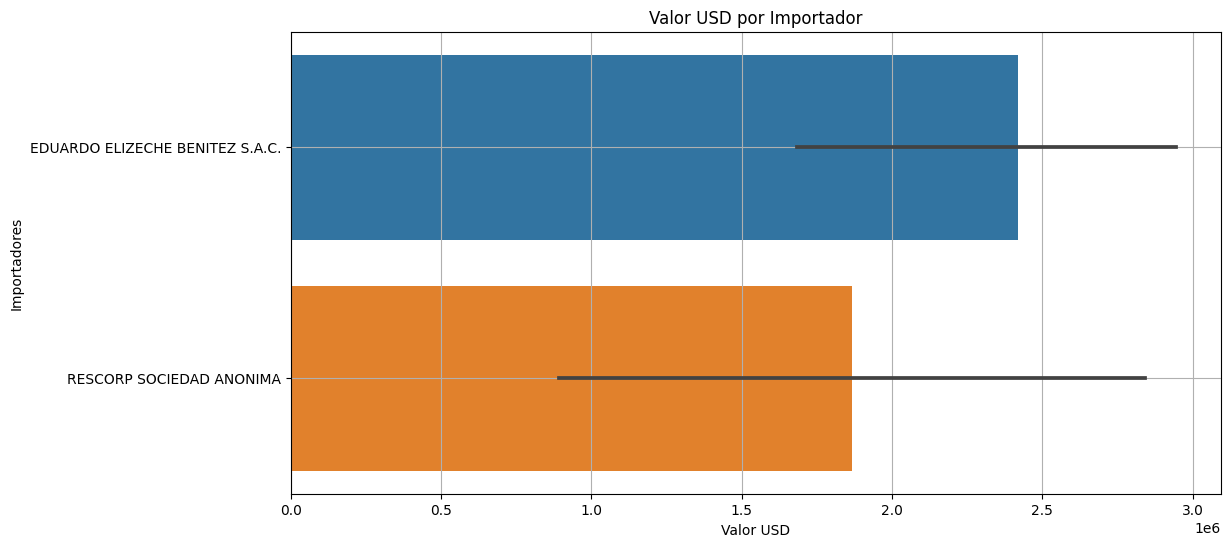

In [ ]:
# Generar una paleta de colores personalizada
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=data_RMI, y='IMPORTADOR', x='VALOR FINAL', estimator='sum')
plt.xlabel('Valor USD')
plt.ylabel('Importadores')
plt.title('Valor USD por Importador')
plt.grid(True)

plt.show()

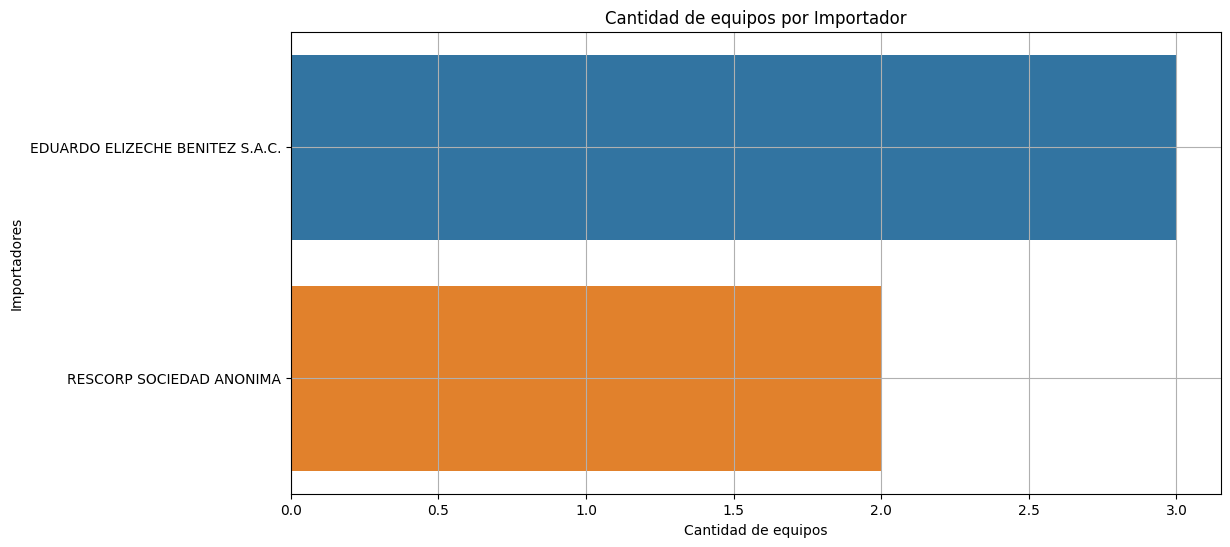

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=data_RMI, y='IMPORTADOR', x='CANTIDAD', estimator='sum')
plt.xlabel('Cantidad de equipos')
plt.ylabel('Importadores')
plt.title('Cantidad de equipos por Importador')
plt.grid(True)

plt.show()

In [ ]:
suma = data_US['VALOR FINAL'].sum()
print(suma)

3796023.2575832326


In [ ]:
cant = data_US['CANTIDAD'].sum()
print(cant)

197.0


In [ ]:
sum_rmi = data_RMI['VALOR FINAL'].sum()
print(sum_rmi)

4286035.652177719
